In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV as dataframe
heart_disease_prediction_df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
# Show the dataframe
heart_disease_prediction_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
# Display N/A values 
heart_disease_prediction_df.isna()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check for NA values in each column
heart_disease_prediction_df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
# Replace Heart Disease Presence and Absense as 1 and 0
heart_disease_prediction_df["Heart Disease"].replace ("Presence", "1", inplace=True)
heart_disease_prediction_df["Heart Disease"].replace ("Absence", "0", inplace=True)

In [7]:
# Show updated dataframe
heart_disease_prediction_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [8]:
# Separate the y variable, the labels
y = heart_disease_prediction_df["Heart Disease"]


# Separate the X variable, the features
X = heart_disease_prediction_df.drop(columns = "Heart Disease")

In [9]:
# Review the y variable Series
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 270 entries, 0 to 269
Series name: Heart Disease
Non-Null Count  Dtype 
--------------  ----- 
270 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [10]:
# Review the X variable DataFrame
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [11]:
# Check the balance of our target values
y.value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_Model = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using training data
LR_Model.fit(X_train, y_train)

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [14]:
# Make a prediction using the testing data
predictions = LR_Model.predict(X_test)

In [15]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8823529411764706

In [16]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[34,  4],
       [ 4, 26]], dtype=int64)

<AxesSubplot:>

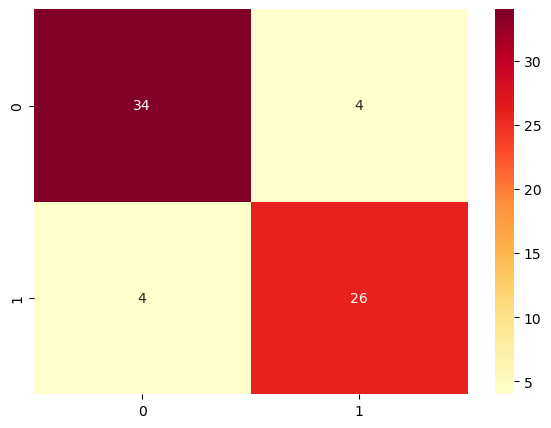

In [17]:
matrix_1 = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(matrix_1, annot=True, ax=ax, fmt='g', cmap="YlOrRd")

In [18]:
# Print the classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.87      0.87      0.87        30

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68



Refering to the classification report, the logistic regression model predicts the '0' (healthy) as 89% and '1' (with heart disease) as 87%.

## Predict a Logistic Regression Model with Resampled Training Data

In [19]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS_Model = RandomOverSampler(random_state=42)

# Fit the original training data to the random_oversampler model
X_OS, y_OS = ROS_Model.fit_resample(X_train, y_train)

In [20]:
# Count the distinct values of the resampled labels data
y_OS.value_counts()

1    112
0    112
Name: Heart Disease, dtype: int64

## Step 3: Evaluate the model’s performance by doing the following:

- Calculate the accuracy score of the model.

- Generate a confusion matrix.

- Print the classification report.

In [21]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_OS_Model = LogisticRegression(random_state = 42)

# Fit the model using the resampled training data
LR_OS_Model.fit(X_OS, y_OS)

# Make a prediction using the testing data
OS_predictions = LR_OS_Model.predict(X_test)

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test, OS_predictions)

0.8676470588235294

In [23]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, OS_predictions)

array([[33,  5],
       [ 4, 26]], dtype=int64)

In [24]:
# Print the classification report for the model
print(classification_report(y_test, OS_predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.84      0.87      0.85        30

    accuracy                           0.87        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.87      0.87      0.87        68



<AxesSubplot:>

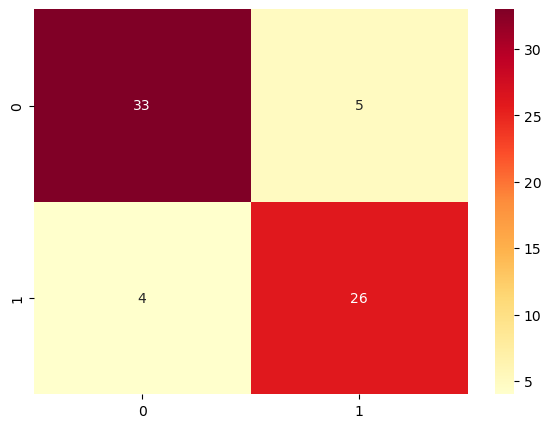

In [25]:
matrix_2 = confusion_matrix(y_test, OS_predictions)
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(matrix_2, annot=True, ax=ax, fmt='g', cmap="YlOrRd")

- TP: The model correctly predicted a positive class instance as positive.
- FP: The model incorrectly predicted a negative class instance as positive.
- FN: The model incorrectly predicted a positive class instance as negative.
- TN: The model correctly predicted a negative class instance as negative.

## Performing hypertune with GridSearchCV

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [28]:
# Define the model as Logistic Regression 
model = LogisticRegression()
model

LogisticRegression()

In [29]:
# Get the parameters of the model
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
# Alter the hypertune parameteres and show them 
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'tol': [0.000001, 0.000005, 0.00001, 0.0001, 0.001],
    'penalty':["l2", "none"],
    'solver':["lbfgs", "newton-cg", "saga"],
    'max_iter': [50, 100, 150]
}
param_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'tol': [1e-06, 5e-06, 1e-05, 0.0001, 0.001],
 'penalty': ['l2', 'none'],
 'solver': ['lbfgs', 'newton-cg', 'saga'],
 'max_iter': [50, 100, 150]}

In [31]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [32]:
# Fit the model by using the grid search classifier. 
# This will take the LogisticRegression model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.600 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.675 total time

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.600 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.600 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, so

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.650 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.600 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.650 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.600 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=5e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=l2, solver=saga, 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.0001

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_i

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=l2, solver

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.0001, 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=150, 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_it

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, to

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalt

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=50, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=50, penalty=none, solver

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.625 total time=   0.0s
[CV 1/5] END C

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=saga, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, p

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_i

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penal

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=l2, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=l2, solver=saga, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, p

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=150, penalty=no

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.659 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=l2, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=1e-06;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=1e-06;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=1e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=50, penalty=no

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.659 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.659 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_ite

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=non

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, pena

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=none, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.659 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penal

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=l2, solver=saga, tol=0.0001;,

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore

[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penal

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.650 tota

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.925 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=newton

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=n

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, penalty=none, solver=saga, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, pen

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solve

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penal

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, to

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.780

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, so

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore

[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=150, penalty=no

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.825

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.925 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.925 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.850 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.850 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.7

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=none, 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=1, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=none, solver=saga, tol=5e-06;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.805 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.800 total tim

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.805 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.805 tota

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.925 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.925 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newt

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=none,

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.850 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.850 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.780 total tim

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.850 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.850 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.925 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.0001;, score=0.634 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.001;, score=0.634 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=l2, solver=saga, tol=0.001;, score=0.675 total time=   

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none,

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.634 total time=   0.0s
[CV 3/5] END C=1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=1, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.756 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.659 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.925 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.756 total

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.659 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.925 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.825 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.73

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.780 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.850 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=none, solver=lbfgs, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 2/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 5/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solve

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 3/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 5/5] END C=10, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solv

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 4/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=none, solver=saga, tol=5e-06;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=lbfgs,

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.634 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.634 total time=   0.0s
[CV 3/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=10, max_iter=150, penalty=none, solver=saga, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.925 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=saga, to

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=1e-06;, score=0.756 to

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

[CV 4/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.925 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.850 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.825 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=none, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 5/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 3/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 1/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 5/5] END C=100, max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.780

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=none, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 4/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=none, solver=saga, tol=5e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=none, solver

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 3/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=l2, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

[CV 1/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, sol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 3/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=15

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 5/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=150,

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 4/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.634 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.675 total time=   0.0s
[CV 4/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=1e-05;, score=0.650 total time=   0.0s
[CV 1/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=100, max_iter=150, penalty=none, solver=saga, tol=0.0001;, score=0.634 total time=   0.0s
[CV 3/5] END C=100, max_iter=150, penalty=none, solver=saga, t

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.850 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.850 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.825 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=l2, solver=lbfgs, tol=0.00

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=l2, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penal

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.850 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=5e-06;, score=0.825 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.850 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.825 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=none, solve

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 3/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty=

[CV 2/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=1000, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1000, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 5/5] END C=1000, max_iter=50, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=1000, max_iter=50, penalty=no

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.829 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.829 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.829 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.829 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=non

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.707 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalt

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.683 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=1000, max_iter=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.675 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.700 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.0001;, score=0.650 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.683 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.675 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=none, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=none, s

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=5e-06;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, to

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=lbfgs, tol=0.001;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_ite

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END C=1000, max_iter=150, penalty=l2, solver=saga, tol=0.001;, score=0.700 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=l2, solver=saga, tol=0.001;, score=0.650 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, sol

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=5e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.900 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=lbfgs, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore

[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=5e-06;, score=0.800 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=newton-cg, tol=0.001;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.780 total time=   0.0s


C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=1e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.780 total time=   0.0s
[CV 2/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.634 total time=   0.0s
[CV 3/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.675 total time=   0.0s
[CV 4/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.700 total time=   0.0s
[CV 5/5] END C=1000, max_iter=150, penalty=none, solver=saga, tol=5e-06;, score=0.650 total time=   0.0s
[CV 1/5] END C=1000, max_iter=150, penalty=none, solver

C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tonyn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [50, 100, 150], 'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'saga'],
                         'tol': [1e-06, 5e-06, 1e-05, 0.0001, 0.001]},
             verbose=3)

In [33]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'C': 1, 'max_iter': 150, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-06}


In [34]:
# List the best score
print(grid_clf.best_score_)

0.827560975609756


In [35]:
# Make predictions with the hypertuned model
predictions = grid_clf.predict(X_test)
predictions

array(['1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1',
       '1', '0', '1'], dtype=object)

In [36]:
# Score the hypertuned model on the test dataset
grid_clf.score(X_test, y_test)

0.8823529411764706